In this project we are going to take input as 2d face image and create its 3D face model.

**Model initialization:**


Here we are importing few models and then we are using transfer learning here

In [1]:
%pip install torch torchvision torchaudio
%pip install tensorflow
%pip install "modelscope[cv]" -f https://modelscope.oss-cn-beijing.aliyuncs.com/releases/repo.html
%pip install git+https://github.com/NVlabs/nvdiffrast.git
%pip install git+https://github.com/facebookresearch/pytorch3d.git

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Looking in links: https://modelscope.oss-cn-beijing.aliyuncs.com/releases/repo.html
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/NVlabs/nvdiffrast.git to /private/var/folders/10/_0b3z7zx17x8vb390sw85q6m0000gn/T/pip-req-build-6hv5_y6c
  Running command git clone --filter=blob:none --quiet https://github.com/NVlabs/nvdiffrast.git /private/var/folders/10/_0b3z7zx17x8vb390sw85q6m0000gn/T/pip-req-build-6hv5_y6c
  Resolved https://github.com/NVlabs/nvdiffrast.git to commit c5caf7bdb8a2448acc491a9faa47753972edd380
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/facebookresearch/pytorch3d.git to /private/var/folders/10/_0b3z7zx17x8vb390sw85q6m0000gn/T/pip-req-build-mesdbpyh
  Running command git clone --filter=blob:none --quiet 

In [ ]:
import os
import cv2
from moviepy.editor import ImageSequenceClip
from modelscope.models.cv.face_reconstruction.utils import write_obj
from modelscope.outputs import OutputKeys
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks

face_reconstruction = pipeline(Tasks.face_reconstruction, model='damo/cv_resnet50_face-reconstruction', model_revision='v2.0.0-HRN')

2023-08-01 22:20:48,871 - modelscope - INFO - PyTorch version 2.0.1 Found.
2023-08-01 22:20:48,875 - modelscope - INFO - TensorFlow version 2.12.0 Found.
2023-08-01 22:20:48,876 - modelscope - INFO - Loading ast index from /Users/yashsawrikar/.cache/modelscope/ast_indexer
2023-08-01 22:20:48,951 - modelscope - INFO - Loading done! Current index file version is 1.7.1, with md5 d8fa45f007f79d566c5c210f202ec5d6 and a total number of 861 components indexed
2023-08-01 22:20:59,333 - modelscope - INFO - Use user-specified model revision: v2.0.0-HRN
2023-08-01 22:21:04.174496: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 22:21:10,884 - modelscope - INFO - initiate model from /Users/yashsawrikar/.cache/modelscope/

**Results & Run**

here we are taking 2d image whose 3d model we want to create I am here taking my friends image as input

In [ ]:
def save_results(result, save_root):
    os.makedirs(save_root, exist_ok=True)

    # export obj and texture
    mesh = result[OutputKeys.OUTPUT]['mesh']
    texture_map = result[OutputKeys.OUTPUT_IMG]
    mesh['texture_map'] = texture_map
    write_obj(os.path.join(save_root, 'hrn_mesh_mid.obj'), mesh)

    # export rotation video
    frame_list = result[OutputKeys.OUTPUT]['frame_list']
    video = ImageSequenceClip(sequence=frame_list, fps=30)
    video.write_videofile(
        os.path.join(save_root, 'rotate.mp4'), fps=30, audio=False)
    del frame_list

    # save visualization image
    vis_image = result[OutputKeys.OUTPUT]['vis_image']
    cv2.imwrite(os.path.join(save_root, 'vis_image.jpg'), vis_image)

    print(f'Output written to {os.path.abspath(save_root)}')

result = face_reconstruction('00118.jpg')
save_results(result, './face_reconstruction_results')

Moviepy - Building video ./face_reconstruction_results/rotate.mp4.
Moviepy - Writing video ./face_reconstruction_results/rotate.mp4



Moviepy - Done !
Moviepy - video ready ./face_reconstruction_results/rotate.mp4
Output written to /content/face_reconstruction_results


#Visualize results

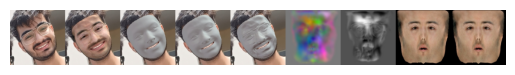

In [ ]:
from matplotlib import pyplot as plt
def vis_img(path):
  img = cv2.imread(path,-1)
  plt.imshow(img[..., ::-1])
  plt.axis("off")
  plt.show()

vis_img('./face_reconstruction_results/vis_image.jpg')

Above image is one of the output which shows how model maps face